In [31]:
from collections import defaultdict
from pathlib import Path
import json
from contextual_mbrl.dreamer.envs import _TASK2CONTEXTS, _TASK2ENV
import numpy as np


TASK2MaxReturn = {
    "classic_cartpole": 500,
    "dmc_walker": 1000
}


In [32]:
import json

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from contextual_mbrl.dreamer.envs import _TASK2CONTEXTS, _TASK2ENV
from collections import defaultdict
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle


def plot2d(logdir, save_dir, task, modality, train_mode, ctx, plot_key, exp_suffix):

    data = defaultdict(list)

    ctx_0 = _TASK2CONTEXTS[task][0]["context"]
    ctx_1 = _TASK2CONTEXTS[task][1]["context"]

    if train_mode == "default":
        env = _TASK2ENV[task]
        default_0 = env.get_default_context()[ctx_0]
        default_1 = env.get_default_context()[ctx_1]
        interpolate_range_0 = [default_0, default_0]
        interpolate_range_1 = [default_1, default_1]
    else:
        interpolate_range_0 = _TASK2CONTEXTS[task][0]["train_range"]
        interpolate_range_1 = _TASK2CONTEXTS[task][1]["train_range"]

    if ctx == "no_ctx":
        exp_path = logdir / f"carl_{task}_{train_mode}_enc_{modality}_dec_{modality}_{exp_suffix}"
        ctx_text = "No context"
    elif ctx == "enc_dec_ctx":
        exp_path = logdir / f"carl_{task}_{train_mode}_enc_{modality}_ctx_dec_{modality}_ctx_{exp_suffix}"
        ctx_text = "Simple context"
    elif ctx == "pgm_ctx":
        exp_path = logdir / f"carl_{task}_{train_mode}_enc_{modality}_dec_{modality}_pgm_ctx_{exp_suffix}"
        ctx_text = "cRSSM"
    elif ctx == "pgm_ctx_adv":
        exp_path = logdir / f"carl_{task}_{train_mode}_enc_{modality}_dec_{modality}_pgm_ctx_adv_{exp_suffix}"
        ctx_text = "Disentangled cRSSM"
    else:
        raise ValueError(f"Unknown ctx {ctx}")
    modality = "Featurized obs" if modality == "obs" else "Pixel obs"
    seeds = 0
    experiment = exp_path.name
    for seed_path in exp_path.iterdir():
        seed = int(seed_path.name)

        eval_file = seed_path / "eval.jsonl"
        if not eval_file.exists():
            continue
        seeds += 1
        with eval_file.open() as f:
            lines = f.readlines()
        lines = [json.loads(line) for line in lines if not json.loads(line)['aggregated_context_metric']]
        for line in lines:
            
            ctx_0_value = line['ctx']["context"][ctx_0]
            ctx_1_value = line['ctx']["context"][ctx_1]
            ret = float(line['return'])
            data[(ctx_0_value, ctx_1_value)].append(ret)

    print(seeds)

    x = []
    y = []
    c = []
    mean_regret = []
    for ctx_0_value, ctx_1_value in data:
        x.append(ctx_0_value)
        y.append(ctx_1_value)
        c.append(np.mean(data[(ctx_0_value, ctx_1_value)]))

    ctx_0 = ctx_0.replace("_", " ").title()
    ctx_1 = ctx_1.replace("_", " ").title()

    df = pd.DataFrame({ctx_0: x, ctx_1: y, "return": c})
    df = df.pivot(index=ctx_0, columns=ctx_1, values="return")
    
    # sort the rows descending
    df = df.sort_index(ascending=False)

    
    # darker colors for higher values, red color map
    ax = sns.heatmap(df, cmap=sns.cm.rocket_r if plot_key == "return" else sns.cm.crest_r, annot=True, fmt=".0f")
    

    h_index_0 = df.index.searchsorted(interpolate_range_0[0], 'left', df.index.argsort())
    h_index_1 = df.index.searchsorted(interpolate_range_0[1], 'right', df.index.argsort())

    v_index_0 = df.columns.searchsorted(interpolate_range_1[0], 'left')
    v_index_1 = df.columns.searchsorted(interpolate_range_1[1], 'right')
    
    ax.add_patch(Rectangle((v_index_0, h_index_0), (v_index_1 - v_index_0), (h_index_1 - h_index_0), fill=False, edgecolor='g', linestyle='--', linewidth=2))
    
    plt.title(f"{task} - {modality} - {ctx_text} - {plot_key.title()}")
    
    plt.savefig(save_dir / f"{task}_{train_mode}_{modality}_{ctx}_{plot_key}.pdf")
    
    # clear plt
    plt.pause(0.1)
    return df

4


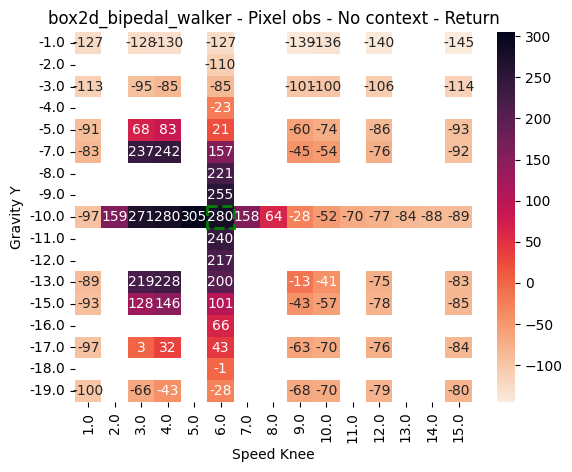

2


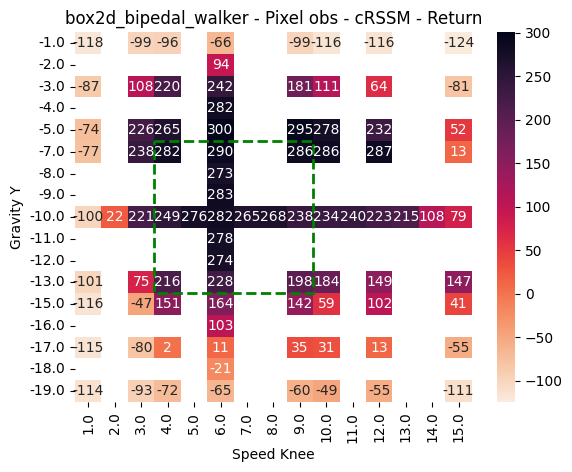

2


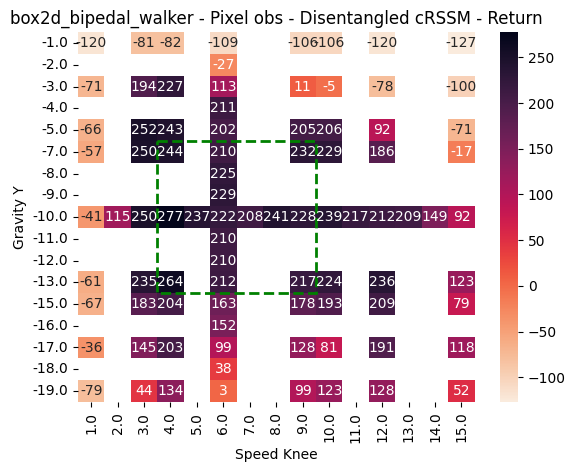

In [33]:
exp_suffix = "normalized"
tasks = ["carl_box2d_bipedal_walker_double_box_enc_img_dec_img_normalized", "dmc_walker"]
modalities = ["obs", "img"]
train_modes = ["default", "double_box"]
logdir = Path("../logs") 

save_dir = Path("./plots_test/")
df1 = plot2d(logdir, save_dir, "box2d_bipedal_walker", "img", "default", "no_ctx", "return", exp_suffix)       
df2 = plot2d(logdir, save_dir, "box2d_bipedal_walker", "img", "double_box", "pgm_ctx", "return", exp_suffix)       
df3 = plot2d(logdir, save_dir, "box2d_bipedal_walker", "img", "double_box", "pgm_ctx_adv", "return", exp_suffix)       

In [27]:
# sum entries in df1 and divide by the number of entries in df1 without NaNs
print(df1.sum().sum() / df1.count().sum())

-6.376130087312435


In [30]:
print(df2.sum().sum() / df2.count().sum())

df22 = df2.copy()
# coloumns where index 


Speed Knee,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
Gravity Y,,,,,,,,,,,,,,,
-1.0,-118.158862,NaN,-99.089673,-96.035653,NaN,-66.383612,NaN,NaN,-99.365498,-116.336893,NaN,-115.807688,NaN,NaN,-124.371507
-2.0,NaN,NaN,NaN,NaN,NaN,94.261882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.0,-87.205738,NaN,107.849901,219.514136,NaN,242.429626,NaN,NaN,181.311863,111.411337,NaN,64.267267,NaN,NaN,-81.057746
-4.0,NaN,NaN,NaN,NaN,NaN,282.161222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.0,-74.100066,NaN,225.729107,264.543420,NaN,300.401605,NaN,NaN,294.911142,255.049654,NaN,222.913078,NaN,NaN,51.962738
-7.0,-77.406904,NaN,237.593978,282.084188,NaN,290.038666,NaN,NaN,286.340879,286.144670,NaN,286.726835,NaN,NaN,12.805154
-8.0,NaN,NaN,NaN,NaN,NaN,272.626688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9.0,NaN,NaN,NaN,NaN,NaN,282.828315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-10.0,-100.141777,22.421616,221.335817,248.685861,275.811343,281.565010,264.639949,268.275736,238.270168,234.145237,239.562861,223.152938,214.546617,108.397835,78.715810


In [29]:
print(df3.sum().sum() / df3.count().sum())

115.44114957449861
